In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

class ImageProcessing:
    def __init__(self):
        self.in_img = None
        self.out_img = None
        self.in_img_path = None

    def img_road(self, path):
        self.in_img_path = path
        self.in_img = cv2.imread(path)
        self.out_img = self.in_img.copy()
        return self.in_img

    def img_show(self, img = "None"):
        if img == "None":
            print("out_img")
            cv2_imshow(self.out_img)            
        else:
            print("img")
            cv2_imshow(img)            
            

    def img_save(self):
        cv2.imwrite(self.in_img_path, self.out_img)
        
    def img_save_as(self, path):
        cv2.imwrite(path, self.out_img)

    def interpolation_nearest(self, img, width, height):
        h, w, c = img.shape
        res = np.full(shape=(height, width, c), fill_value=0, dtype=np.uint8)
        step_y = h / height
        step_x = w / width

        for y in range(height):
            y_index = int(step_y * y)
            if y_index >= h-1: y_index = h-1
            y_img = img[y_index]
            y_res = res[y]
            for x in range(width):
                x_index = int(step_x * x)
                if x_index > w-1: x_index = w-1
                y_res[x][:] = y_img[x_index][:]
        
        self.out_img = res.copy()

    def interpolation_biliner(self, img, width, height):
        h, w, c = img.shape
        res = np.full(shape=(height, width, c), fill_value=0, dtype=np.uint8)
        step_y = h / height
        step_x = w / width

        for y in range(height):
            y_index = step_y * y
            y_up = int(np.trunc(y_index))
            y_down = int(np.ceil(y_index))
            if y_down >= h-1: y_down = h-1

            w1 = 1 - (y_index - y_up)
            w2 = (y_index - y_up)

            data_y_up = img[y_up]
            data_y_down = img[y_down]
            data_y_res = res[y]
            
            for x in range(width):
                x_index = step_x * x
                x_left = int(np.trunc(x_index))
                x_right = int(np.ceil(x_index))
                if x_right >= w-1: x_right = w-1
                w3 = 1 - (x_index - x_left)
                w4 = x_index - x_left
                
                val = (data_y_up[x_left] * w4*w1 + 
                       data_y_up[x_right] * w3*w2 +
                       data_y_down[x_left] * w4*w2 +
                       data_y_down[x_right] * w3*w1)

                for i in range(c):
                    temp = int(val[i]);
                    if temp > 255: temp = 255
                    val[i] = temp

                data_y_res[x][:] = val
        
        self.out_img = res.copy()

    def resize(self, width, height, img = "None", interpolation = 0):
        if img == "None":
            img = self.in_img

        if interpolation == 0:  # nearest neighbor interpolation 
            self.interpolation_nearest(img, width, height)
            return self.out_img
        elif interpolation == 1: # bilinear interpolation
            self.interpolation_biliner(img, width, height)
            return self.out_img
        elif interpolation == 2: # bicubic interpolation
            pass

    def rotation(self):
        pass
    def cropping(self):
        pass
    def color_space(self):
        pass
    def bright(self):
        pass
    def extract_color(self):
        pass
    def color_change(self):
        pass
    def sharpening(self):
        pass
    def blurring(self):
        pass
    def add_text(self):
        pass

In [ ]:
from google.colab import files
file1 = files.upload()

Saving flower.jpg to flower.jpg


out_img


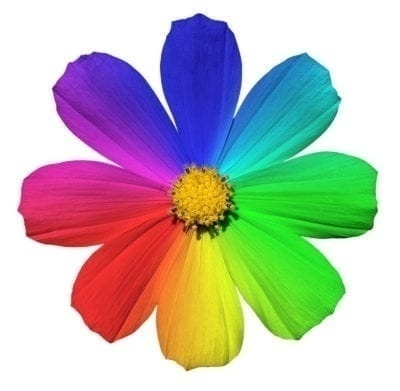

img


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


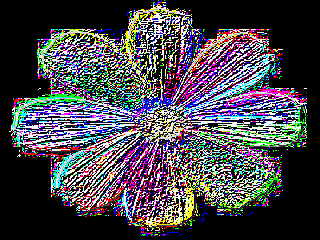

img


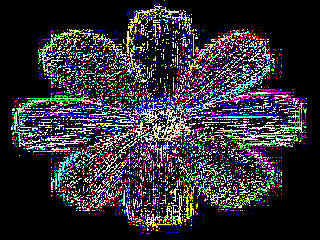

In [ ]:
ip = ImageProcessing()

input = ip.img_road("flower.jpg")
ip.img_show()
ip.img_save()
ip.img_save_as("flower2.jpg")
res1 = ip.resize(width=320, height = 240)
#ip.img_show(img = res1)
res2 = ip.resize(width=320, height = 240, interpolation = 1)
#ip.img_show(img = res2)
res3 = np.abs(np.subtract(cv2.resize(input, dsize=(320,240)),res1))
res4 = np.abs(np.subtract(cv2.resize(input, dsize=(320,240)),res2))
ip.img_show(img = res3)
ip.img_show(img = res4)